# A Look into Customers Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../datasets/customers_dataset.csv')
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## Data Exploration

### Data Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


As can be seen above, no missing value from `customers_dataset`. <br>
We can also consider changing `customer_zip_code_prefix` dtype into object because the values do not represent a numerical value. Instead it merely represents encoding of certain area thus making it essentially categorical.

In [6]:
df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
df.describe(include=[object])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


### Customer City Count

In [18]:
city_count = df.customer_city.value_counts().reset_index(name='counts')
city_count

,customer_city,counts
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,olhos d'agua,1
4115,pacotuba,1
4116,sao sebastiao do paraiba,1
4117,benedito leite,1


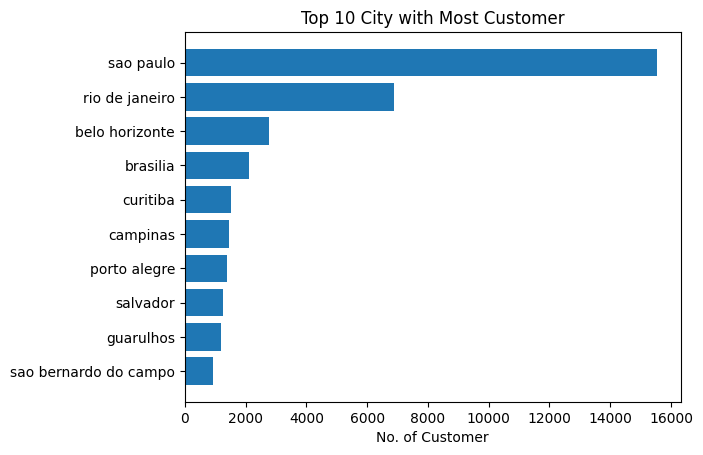

In [31]:
fig, ax = plt.subplots()

cities10 = city_count.customer_city[:10].to_numpy()
y_pos = np.arange(len(cities10))
counts10 = city_count.counts[:10].to_numpy()

ax.barh(y_pos, counts10, align='center')
ax.set_yticks(y_pos, labels=cities10)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('No. of Customer')
ax.set_title('Top 10 City with Most Customer')

plt.show()

### Customer State Count

In [32]:
state_count = df.customer_state.value_counts().reset_index(name='counts')
state_count

,customer_state,counts
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


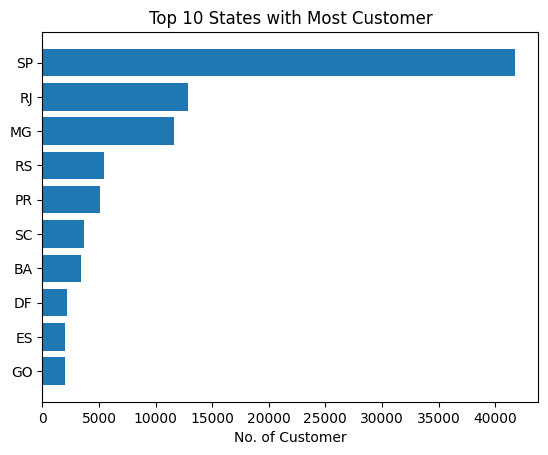

In [35]:
fig, ax = plt.subplots()

states10 = state_count.customer_state[:10].to_numpy()
y_pos = np.arange(len(states10))
counts10 = state_count.counts[:10].to_numpy()

ax.barh(y_pos, counts10, align='center')
ax.set_yticks(y_pos, labels=states10)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('No. of Customer')
ax.set_title('Top 10 States with Most Customer')

plt.show()

### Customer Zip Code Prefix Count

In [10]:
df.customer_zip_code_prefix.astype('category').value_counts().reset_index(name='counts')

,customer_zip_code_prefix,counts
0,22790,142
1,24220,124
2,22793,121
3,24230,117
4,22775,110
...,...,...
14989,74980,1
14990,1003,1
14991,99970,1
14992,99925,1


### Further Look into Customer Id and Customer Unique Id
We would like to gain a better understanding of the nature and distinction between these two columns.

**Check Duplicates**

In [36]:
df[df.customer_id.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


`customer_id` has no duplicates.

In [37]:
df[df.customer_unique_id.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


There is a noticeable amount of duplicates of `customer_unique_id`.

**Value Counts**

In [53]:
cust_uid = df.customer_unique_id.value_counts().reset_index(name='counts')
cust_uid.head(10)

,customer_unique_id,counts
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,6469f99c1f9dfae7733b25662e7f1782,7
5,f0e310a6839dce9de1638e0fe5ab282a,6
6,63cfc61cee11cbe306bff5857d00bfe4,6
7,12f5d6e1cbf93dafd9dcc19095df0b3d,6
8,de34b16117594161a6a89c50b289d35a,6
9,47c1a3033b8b77b3ab6e109eb4d5fdf3,6


If we understand the term "unique" to mean that one customer is represented by one id, thus this indicates that customers dataset actually has reappearing customer instance with the same id. But we are yet to uncover the reason or purpose of the coexistence of both customer id and customer unique id. Next we will try to investigate the relationship between the two columns.

### Observation Across Datasets

After doing an observation across the available datasets, it became evident that the customer dataset has the same number of rows as the orders dataset. 

Additionally, both dataset have `customer_id` column. We'll check if the column in both dataset has matching rows. We use the left join and right join functions to find whether one dataset contains at least one row that is not present in the other.

In [41]:
# get orders dataset
orders_df = pd.read_csv('../datasets/orders_dataset.csv')
cust_df = df[:]
print("No. of Rows")
print(f"Orders Dataset: {orders_df.shape[0]}")
print(f"Customers Dataset: {cust_df.shape[0]}")

No. of Rows
Orders Dataset: 99441
Customers Dataset: 99441


In [47]:
# left join cust_df & orders_df
left_join = cust_df.merge(orders_df, on=['customer_id'], how='left', indicator=True)
left_join[left_join['_merge'] == 'left_only']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,_merge


In [49]:
left_join._merge.value_counts()

_merge
both          99441
left_only         0
right_only        0
Name: count, dtype: int64

In [50]:
# right join cust_df & orders_df
right_join = cust_df.merge(orders_df, on=['customer_id'], how='right', indicator=True)
right_join[right_join['_merge'] == 'right_only']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,_merge


In [51]:
right_join._merge.value_counts()

_merge
both          99441
left_only         0
right_only        0
Name: count, dtype: int64

As illustrated in the above code, both datasets have identical values for the `customer_id` column. Hence, we can conclude `customer_id` here acts as a foreign key in orders dataset from customers dataset. <br>
If `customer_id`'s presence is to act as a foreign key, while on the other hand `customer_unique_id` is a reference to a unique customer, then it would infer that, in orders dataset, there are multiple orders made by the same customers.

---
**Insight**: `customer_unique_id` refers to each unique customer in customers dataset, while `customer_id`  acts as an customer identifier for each orders created and a foreign key between orders dataset and customers dataset.